# Part I - (San Francisco Bay Bike-Sharing Data)
## by (Amangele Oyinmiebi)

## Introduction
> This data set include information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area and attributes for approximately 183,412 trip data.



## Preliminary Wrangling


In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [9]:
#loading the data for analysis
ford = pd.read_csv('fordgobike_tripdata.csv')
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Data Wrangling Process
>Creating distance column 

>Creating speed column

> Converting start_time to date_time format and extract time and week information from it.

> Extracting memebers exact age from the birth year and converting it to integer format.

> Columns to be removed before exploration: end_time, start_time, start_station_id, end_station_id, start and end station long and lat, birth year etc.


In [10]:
#creating a distance and speed column
from math import radians, cos, sin,asin,sqrt
def distance(lat1,lat2,long1,long2):
    #The math module contains a function named
    #radians which converts from degrees to radians
    long1 = radians(long1)
    long2 = radians(long2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    
    #Haversine formula
    dlong = long2 - long1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlong/2)**2
    c = 2 * asin(sqrt(a))
    #radius of the earth in kilometers i s 6378.8
    r = 6378.8
    # calculate the result
    return (c*r)
ford['distance'] = ford.apply(lambda row: distance(row['start_station_latitude'],row['end_station_latitude'],row['start_station_longitude'],row['end_station_longitude']),axis=1)
#The current unit of distance is in kilometer

In [11]:
#converting distance from kilometer to meter
ford['distance'] = ford['distance'] * 1000
#finding the speed in m/s
ford['speed'] = ford['distance']/ford['duration_sec']
ford

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,speed
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,545.375389,0.010451
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,1745.133087,0.041042
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2707.856299,0.043778
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,261.057766,0.007154
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2412.251118,1.521925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,1466.559618,3.055333
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,1404.433332,4.487007
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,379.529925,2.691702
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,748.197381,5.382715


In [12]:
#converting to datetime format and extracting hours and weekdays 
ford['start_time'] = pd.to_datetime(ford['start_time'])
ford['hours']  =pd.to_datetime(ford['start_time']).dt.hour
ford['week'] = pd.to_datetime(ford['start_time']).dt.weekday
ford.tail(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,speed,hours,week
183362,899,2019-02-01 01:08:39.015,2019-02-01 01:23:38.7980,58.0,Market St at 10th St,37.776619,-122.417385,133.0,Valencia St at 22nd St,37.755213,-122.420975,2033,Subscriber,1999.0,Male,No,2404.052199,2.674140,1,4
183363,673,2019-02-01 01:12:24.420,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No,2068.728921,3.073891,1,4
183364,892,2019-02-01 01:08:43.731,2019-02-01 01:23:35.7630,58.0,Market St at 10th St,37.776619,-122.417385,133.0,Valencia St at 22nd St,37.755213,-122.420975,3392,Subscriber,2000.0,Male,No,2404.052199,2.695126,1,4
183365,932,2019-02-01 01:07:51.908,2019-02-01 01:23:24.3700,58.0,Market St at 10th St,37.776619,-122.417385,133.0,Valencia St at 22nd St,37.755213,-122.420975,4962,Subscriber,2000.0,Female,No,2404.052199,2.579455,1,4
183366,932,2019-02-01 01:07:49.971,2019-02-01 01:23:22.5280,58.0,Market St at 10th St,37.776619,-122.417385,133.0,Valencia St at 22nd St,37.755213,-122.420975,5382,Subscriber,2000.0,Female,No,2404.052199,2.579455,1,4
183367,295,2019-02-01 01:13:45.276,2019-02-01 01:18:41.2670,338.0,13th St at Franklin St,37.803189,-122.270579,372.0,Madison St at 17th St,37.804037,-122.262409,1448,Subscriber,1981.0,Male,No,724.840885,2.457088,1,4
183368,449,2019-02-01 01:10:32.399,2019-02-01 01:18:01.8870,364.0,China Basin St at 3rd St,37.772000,-122.389970,27.0,Beale St at Harrison St,37.788059,-122.391865,5275,Subscriber,1995.0,Male,No,1795.702099,3.999337,1,4
183369,537,2019-02-01 01:05:08.569,2019-02-01 01:14:05.9230,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,241.0,Ashby BART Station,37.852477,-122.270213,15,Subscriber,1982.0,Female,No,1812.969792,3.376108,1,4
183370,612,2019-02-01 01:03:45.908,2019-02-01 01:13:58.6060,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,241.0,Ashby BART Station,37.852477,-122.270213,414,Subscriber,1982.0,Female,No,1812.969792,2.962369,1,4
183371,196,2019-02-01 01:08:38.641,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No,462.593863,2.360173,1,4


In [13]:
#Getting the exact age of  all members
#since this dataset is a 2019 dataset I'll will be getting their age based on that year.
ford['member_age'] = 2019 - ford['member_birth_year']
ford['member_age'] = ford['member_age'].astype('Int64')
ford

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,speed,hours,week,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,545.375389,0.010451,17,3,35
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,1745.133087,0.041042,18,3,<NA>
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,2707.856299,0.043778,12,3,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,261.057766,0.007154,17,3,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,2412.251118,1.521925,23,3,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,4832,Subscriber,1996.0,Male,No,1466.559618,3.055333,0,4,23
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,4960,Subscriber,1984.0,Male,No,1404.433332,4.487007,0,4,35
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,3824,Subscriber,1990.0,Male,Yes,379.529925,2.691702,0,4,29
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,5095,Subscriber,1988.0,Male,No,748.197381,5.382715,0,4,31


In [55]:
ford['member_age'].describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

In [56]:
#found an outlier in the age and therefore dropping the column
f = ford[ford.member_age > 120]
ford = ford.drop(f.index,axis=0)
ford.member_age.describe()

count    175146.000000
mean         34.192953
std          10.113498
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         119.000000
Name: member_age, dtype: float64

In [14]:
#creating an age group column
bin_edges = [18,27,32,60,119]
bin_names = ['Tenager','Youth', 'Adult','Elderly']
ford['age_group'] = pd.cut(ford.member_age,bin_edges,labels= bin_names)
ford

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,speed,hours,week,member_age,age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,545.375389,0.010451,17,3,35,Adult
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,1745.133087,0.041042,18,3,<NA>,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,2707.856299,0.043778,12,3,47,Adult
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,261.057766,0.007154,17,3,30,Youth
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,2412.251118,1.521925,23,3,45,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,Subscriber,1996.0,Male,No,1466.559618,3.055333,0,4,23,Tenager
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,Subscriber,1984.0,Male,No,1404.433332,4.487007,0,4,35,Adult
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,Subscriber,1990.0,Male,Yes,379.529925,2.691702,0,4,29,Youth
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,Subscriber,1988.0,Male,No,748.197381,5.382715,0,4,31,Youth


In [15]:
#dropping the column that will not be needed
col_name = ['duration_sec','start_time','end_time','start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','member_birth_year']
ford = ford.drop(col_name,axis=1)
ford

,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,distance,speed,hours,week,member_age,age_group
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,No,545.375389,0.010451,17,3,35,Adult
1,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,No,1745.133087,0.041042,18,3,<NA>,NaN
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,2707.856299,0.043778,12,3,47,Adult
3,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,No,261.057766,0.007154,17,3,30,Youth
4,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,Yes,2412.251118,1.521925,23,3,45,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
183407,Beale St at Harrison St,Union Square (Powell St at Post St),4832,Subscriber,Male,No,1466.559618,3.055333,0,4,23,Tenager
183408,Montgomery St BART Station (Market St at 2nd St),3rd St at Townsend St,4960,Subscriber,Male,No,1404.433332,4.487007,0,4,35,Adult
183409,The Alameda at Bush St,Morrison Ave at Julian St,3824,Subscriber,Male,Yes,379.529925,2.691702,0,4,29,Youth
183410,San Pablo Ave at MLK Jr Way,San Pablo Ave at 27th St,5095,Subscriber,Male,No,748.197381,5.382715,0,4,31,Youth


In [59]:
ford.shape

(183411, 12)

In [60]:
ford.describe()

,bike_id,distance,speed,hours,week,member_age
count,183411.000000,183411.000000,183411.000000,183411.000000,183411.000000,175146.000000
mean,4472.895671,1692.709119,2.997487,13.458446,2.632192,34.192953
std,1664.381619,1098.903187,1.098342,4.724980,1.814781,10.113498
min,11.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,3777.000000,912.070616,2.408756,9.000000,1.000000,27.000000
50%,4958.000000,1432.426104,3.068910,14.000000,3.000000,32.000000
75%,5502.000000,2228.411744,3.707713,17.000000,4.000000,39.000000
max,6645.000000,69554.291707,10.015017,23.000000,6.000000,119.000000


### What is the structure of your dataset?

> There are 183411 trip data in the datset with 12 features(start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,distance,speed,hours,week,member_age,age_group).The variables are both numeric and string in nature.

### What is/are the main feature(s) of interest in your dataset?

> I am mostly intrested in the what are the factors that affects the speed of each member and the time of the day and the week that most people utilize the bike system.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The factors that I believe will be useful in the investigation of the speed will be distance, user_type, member_gender and age_group. Then the factors for the investigation of time will be hours and week.
Then for the week encoding 0=Monday,1=Tuesday,2=Wednesday,3=Thursday,4=Friday,5=Saturday and 6=Sunday.

## Univariate Exploration



I'll start by looking at the distribution of the main feature:speed

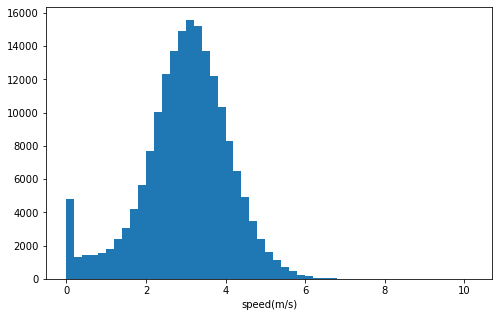

In [61]:
bin_size=0.2
bin_edge= np.arange(0,ford['speed'].max()+bin_size,bin_size)
plt.figure(figsize=[8,5])
plt.hist(data=ford,x='speed',bins=bin_edge)
plt.xlabel('speed(m/s)')
plt.show();

This is a unimodal graph but there seems to be a peak at the zero point. In which the speed from one point to another cannot be zero. Therefore, this calls for further investigation. 

In [62]:
#checking for the data that the speed were o(m/s)
ford[ford.speed == 0]

,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,distance,speed,hours,week,member_age,age_group
19,Telegraph Ave at 23rd St,Telegraph Ave at 23rd St,5629,Customer,Male,No,0.0,0.0,23,3,41,Adult
27,Folsom St at 9th St,Folsom St at 9th St,5410,Subscriber,Male,No,0.0,0.0,23,3,37,Adult
34,Valencia St at 22nd St,Valencia St at 22nd St,5559,Subscriber,Male,No,0.0,0.0,23,3,27,Tenager
53,Davis St at Jackson St,Davis St at Jackson St,319,Customer,NaN,No,0.0,0.0,22,3,<NA>,NaN
55,Davis St at Jackson St,Davis St at Jackson St,1846,Subscriber,Male,No,0.0,0.0,22,3,24,Tenager
...,...,...,...,...,...,...,...,...,...,...,...,...
183317,Hubbell St at 16th St,Hubbell St at 16th St,5224,Subscriber,Male,No,0.0,0.0,2,4,52,Adult
183318,Woolsey St at Sacramento St,Woolsey St at Sacramento St,4913,Subscriber,Male,No,0.0,0.0,2,4,32,Youth
183326,Raymond Kimbell Playground,Raymond Kimbell Playground,5366,Subscriber,Male,No,0.0,0.0,1,4,47,Adult
183350,Haste St at College Ave,Haste St at College Ave,3232,Subscriber,Male,Yes,0.0,0.0,1,4,24,Tenager


Because speed from one point to the other cannot be zero, I'll be removing this data from the dataset and then replot the graph.

In [16]:
#getting the index values for the rows that the speed were 0m/s
f=ford[ford.speed == 0].index
ford = ford.drop(f,axis=0)
#checking if it has been drop
ford[ford.speed == 0]

,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,distance,speed,hours,week,member_age,age_group


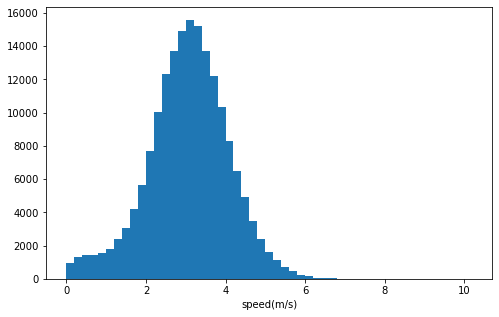

In [64]:
#replotting the speed graph to see the changes
bin_size= 0.2
bin_edges = np.arange(0,ford['speed'].max()+bin_size,bin_size)
plt.figure(figsize=[8,5])
plt.hist(data=ford,x='speed',bins=bin_edges)
plt.xlabel('speed(m/s)')
plt.show()

The graph is a unimodal graph.That is, it is symmetic.

Now considering the second main features of interest: Hours and Week.

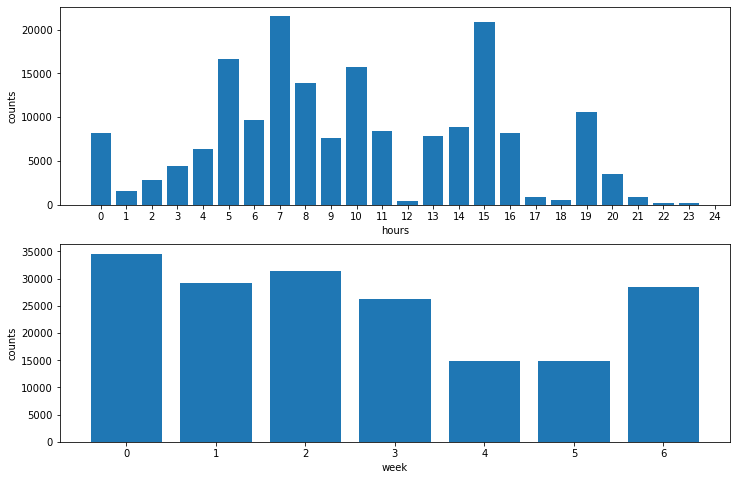

In [65]:
#plotting a bar graph to depicit the hour that most people use the bike system
plt.figure(figsize=[12,8])
#for the first subplot
plt.subplot(2,1,1)
x = ford.hours.unique()
y= ford.hours.value_counts(sort=False)
plt.bar(x,y)
plt.xticks(range(0,25,1))
plt.xlabel('hours')
plt.ylabel('counts')
#for the second subplot
plt.subplot(2,1,2)
a= ford.week.unique()
b= ford.week.value_counts(sort=False)
plt.bar(a,b)
plt.xticks(range(0,7,1))
plt.xlabel('week')
plt.ylabel('counts');

This graph shows a very intresting insight.We can observe that people make use of the bike system at 7am and at 3pm and also on monday's and wednesday's

I'll now move on to check the distribution of the variable:distance.

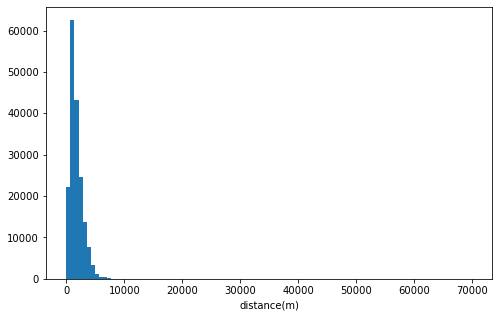

In [66]:
#starting with a normal scale
bin_size = 700
bin_edges = np.arange(0, ford.distance.max()+bin_size,bin_size)
plt.figure(figsize= [8,5])
plt.hist(data=ford,x='distance',bins=bin_edges)
plt.xlabel('distance(m)');

The distribution of the data is right_skewed and much of the information is does not show. Therefore, I'll perform a log transform

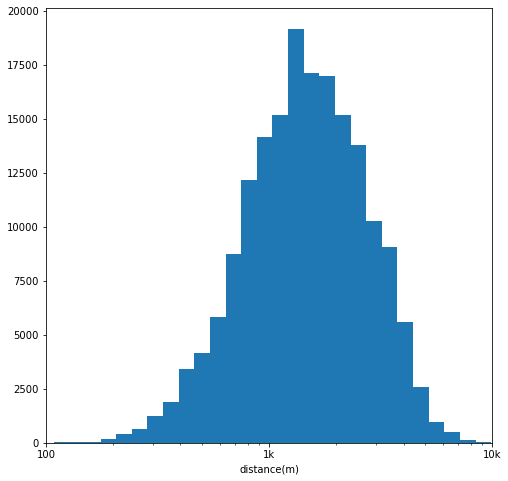

In [82]:
#The distribution is right_skewed therefore performing a log scale transfromation
log_bin= 0.07
bins = 10**np.arange(np.log10(ford.distance.min()),np.log10(ford.distance.max())+log_bin,log_bin)
plt.figure(figsize=[8,8])
plt.hist(data = ford, x= 'distance',bins=bins)
plt.xscale('log')
plt.xticks([1e1,1e2,1e3,1e4,1e5],['10','100','1k','10k','100k'])
plt.xlim([100,1e4])
plt.xlabel('distance(m)')
plt.show();

After performing a log transform, we can see that the data distribution for distance is unimodal.

Now considering the other remaining features that can associated with the speed: User_type, Member_gender and Age_group.

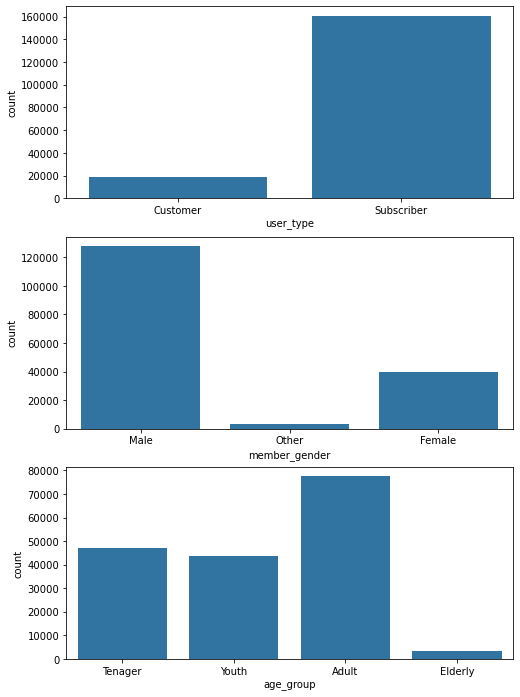

In [84]:
#Plotting a bar_chart to see the user_type, Member_gender and Age_group
fig,ax = plt.subplots(nrows=3,figsize=[8,12])
base_color = sb.color_palette()[0]
sb.countplot(data=ford,x='user_type',color=base_color,ax=ax[0])
sb.countplot(data=ford,x='member_gender',color=base_color,ax=ax[1])
sb.countplot(data=ford,x='age_group',color=base_color,ax=ax[2])
plt.show();

From the graph above, it can be seen that Subscribers , Males and more of Adult use this bike share system. But further investigation will be needed to see their relationship and how they affect the speed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  Yes, when dealing with the distrubution of distance in the graph.The first plot was right skewed.Then, I had to perform a log transform.Of which gave me a unimodal distribution after.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, the first plot of the histogram of speed showned a spike at the 0 point.Of which, the speed between two points cannot be zero.Therefore, it was considered as an outlier and the data needed to be removed before plotting it again.

## Bivariate Exploration



Fristly, I'll want  to check the relationship with speed and distance.Using a heatmap to see how correlated they are.

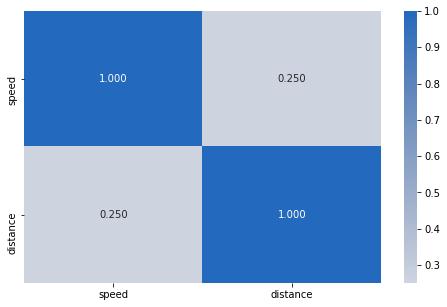

In [69]:
#To check the correlation between speed and distance
numeric_var= ['speed','distance',]
plt.figure(figsize=[8,5])
sb.heatmap(ford[numeric_var].corr(), annot=True, fmt = '.3f' ,cmap='vlag_r',center=0)
plt.show()

From this heatmap it is seen that speed and distance have a weak positive correlation..And that should be because there are different start and end locations for the riders and depending on there purpose which are other characteritics not depicted in the dataset could influence their speed.

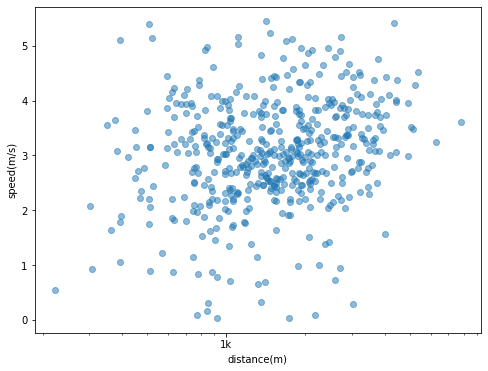

In [17]:
#plotting a scatter plot of speed and distance to just see it visually and plotting the distance on a log scale
plt.figure(figsize=[8,6])
ford_subset=ford.sample(n=500,replace=False)
plt.scatter(data=ford_subset,x='distance',y='speed',alpha=1/2)
plt.xscale('log')
plt.xticks([1e3],['1k'])
plt.xlabel('distance(m)')
plt.ylabel('speed(m/s)')
plt.show()

This scatter plot just give us a better view of the correlation of which is a weak positive one.

Now,considering the relationship between speed and user_type.

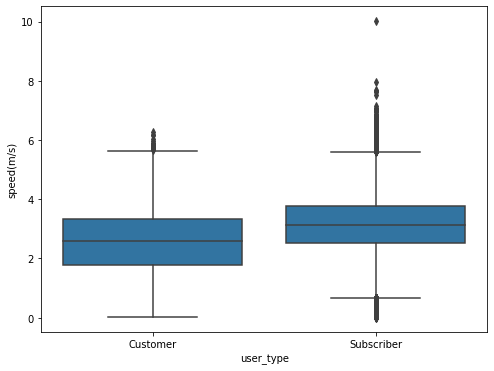

In [71]:
#I'll will be using a box plot to see the relationship with speed and user_type
plt.figure(figsize=[8,6])
base_color= sb.color_palette()[0]
sb.boxplot(data=ford,x='user_type',y='speed',color=base_color)
plt.ylabel('speed(m/s)')
plt.show()

From the above graph it show that subcribers moved at faster speed than Customers.It also shows that because the subscribers use the bike share system more, they are already familiar to the terrain and therefore move faster than people who are just visiting. But there seems to be an outlier of the subscriber at 10m/s which call for further investigation.

In [72]:
#checking the speed at 10m/s
ford[ford.speed > 9]

,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,distance,speed,hours,week,member_age,age_group
112038,Montgomery St BART Station (Market St at 2nd St),Palm St at Willow St,4780,Subscriber,Female,No,69554.291707,10.015017,14,1,34,Adult


From the above investigation.It is possible for the person to move at that speed consider the greater distance that was to be covered and the person is still a young adult.Therefore, the data will not be removed.

Moving on to another relationship between speed and age_group using a box plot.

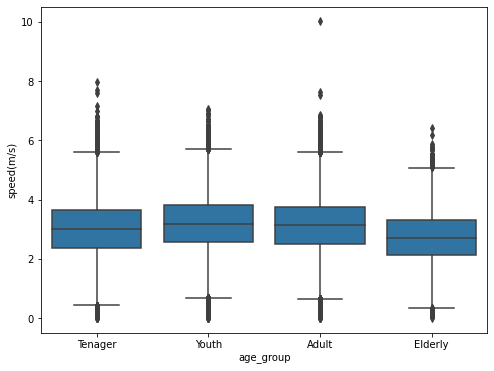

In [73]:
#plotting a box plot between speed and age_group
plt.figure(figsize=[8,6])
sb.boxplot(data=ford,x='age_group',y='speed',color=base_color)
plt.ylabel('speed(m/s)')
plt.show()

The box plot in this graph shows how age factor affects the speed of the rider. It can be seen that the youth ride faster than the adult, the adult ride faster than the tenager and the tenager's ride faster than Elderly.

Considering speed and gender.

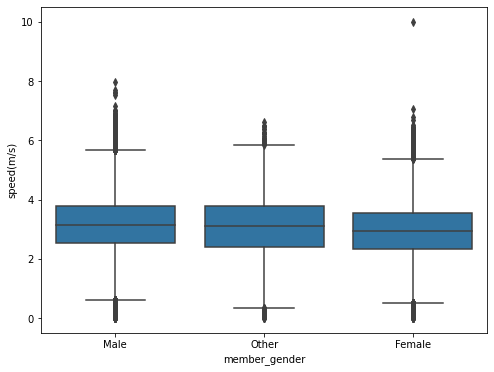

In [74]:
#plotting a box plot to show the relationship between speed and member_gender
plt.figure(figsize=[8,6])
sb.boxplot(data=ford,x='member_gender',y='speed',color=base_color)
plt.ylabel('speed(m/s)')
plt.show()

This box plot shows the relationship between gender. And it can be seen that the gender affects the speed of the rider. In the sense that the males moved with more speed than the females,

considering distance and age_group.

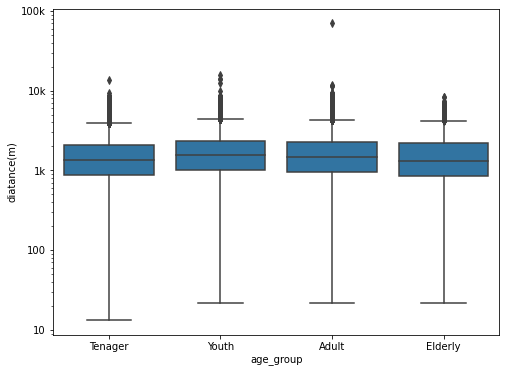

In [75]:
#plotting a box plot relationship between distance and age_group
plt.figure(figsize=[8,6])
sb.boxplot(data=ford, x='age_group',y='distance',color=base_color)
plt.yscale('log')
plt.ylabel('diatance(m)')
plt.yticks([1e1,1e2,1e3,1e4,1e5],['10','100','1k','10k','100k'])
plt.show()

This box plot shows the relationship between distances and age_group. It can be observed that the relationship between distance and age_group is similar to the relationship between speed and age_group because they have a correlation. The younger one's cover more distance than the elderly one's.

Considering a clustered barchart for the relationship with hours and age_group and age_group with user_type

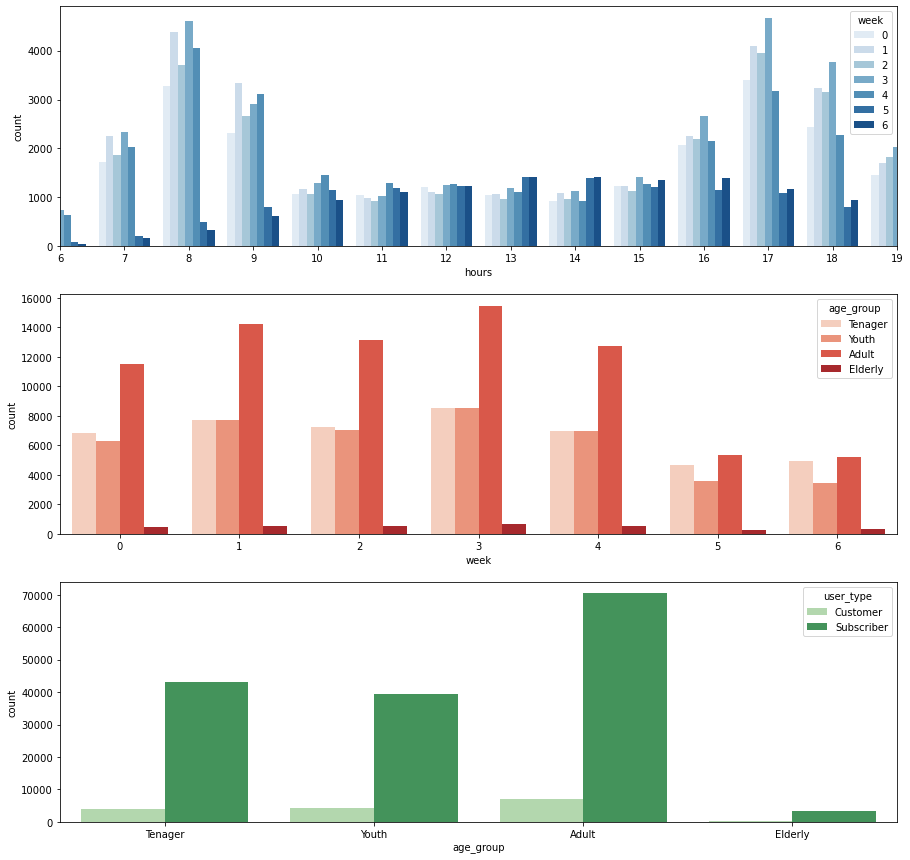

In [76]:
#plotting a clustered barchart between hours and age_group
plt.figure(figsize=[15,15])
plt.subplot(3,1,1)
sb.countplot(data=ford,x='hours',hue= 'week',palette='Blues')
plt.xlim(6,19)
#plotting a clustered barchart between weeks and age_group
plt.subplot(3,1,2)
sb.countplot(data=ford,x='week',hue='age_group',palette='Reds')
#plotting a clustered barchart between age_group and user_type
plt.subplot(3,1,3)
sb.countplot(data=ford,x='age_group',hue='user_type',palette='Greens')
plt.show()

From the clustered bar chart showing the relationship between the hours and week. It can be seen that on thursdays people tend to use the bike sytem at 7am,8am,5pm and 6pm more. Then on weekends people tend to use the system around 1pm and 2pm.

Then from the relationship between week and age_group, it can be seen again that adults use the system during the week more with its peak at thrusday and tuesdays.

From the relationship between age_group and user_type. It can be obersered that we have more adult subscribers than the other age_group.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that speed and distance had a weak positive correlation. Then I also oberved that the people who were subscribers moved at a faster speed than those that were customers in the relationship between speed and user_type.Then I also observed that that age had effect on the speed at which individual moved and finally the male gender moved at faster speed than the other gender.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I found out that on thrusdays people use the bike system more at 7am,8am, 5pm and 6pm. And on sundays and saturdays people use the system around 1pm and 2pm.

## Multivariate Exploration



I'll start by exploring the relationship  between speed, age_group and member_gender,

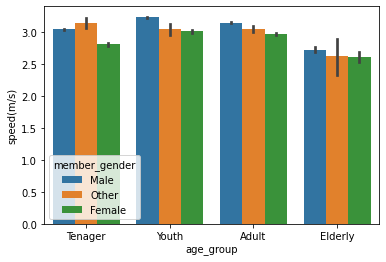

In [77]:
#plotting a clustered bar graph to show the relationship between speed, age_group and member_gender
sb.barplot(data=ford,x='age_group',y='speed',hue='member_gender')
plt.ylabel('speed(m/s)')
plt.show()

It can be seen that in the highest group that moved with more speed which are the `youth`, the `males` were the one that traveled with higher speed and throughout the age_group except for the tenager category in which `Others` was the highest

Plotting a clustered barchart that shows the relationship between speed, age_group and user_type.

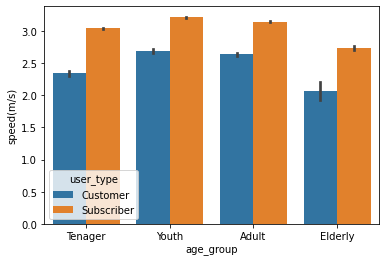

In [78]:
#plotting a clusterd barchart between speed, age_group nad user_type
sb.barplot(data=ford,x='age_group',y='speed',hue='user_type')
plt.ylabel('speed(m/s)')
plt.show()

Accross the age_group, it can be seen that the majority were Subscribers and all of them moved at more speed than customers

Plotting a scatter plot to show the relationship between speed distance and age_group.

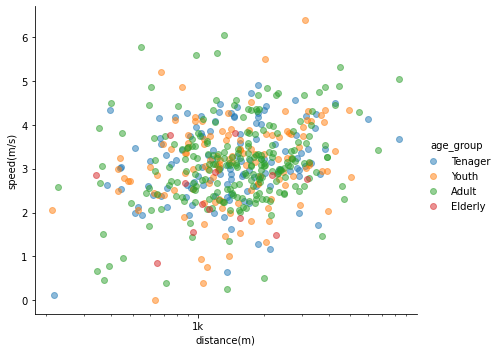

In [19]:
ford_subset= ford.sample(n=500,replace=False)
g= sb.FacetGrid(data=ford_subset,hue='age_group',height=5,aspect=1.2)
g.map(plt.scatter,'distance','speed',alpha=1/2)
plt.xscale('log')
plt.xticks([1e3],['1k'])
plt.ylabel('speed(m/s)')
plt.xlabel('distance(m)')
g.add_legend();

Since we have ascertained that speed and distance has a relationship and also speed and age_group has a relationship it can be deduced from the scatter plot that:

From the above the age_group had their ranges of their speed and the distances that they covered.
> The `Tenagers` had an average speed between 1m/s and 5m/s and covered a range of distance of 400m- 1300m.

> The `Youths` had an average speed between 2m/s and 5m/s and covered a range of distance of 600m-1400m.

> The `Adults` had an average speed between 2m/s and 4m/s and covered a range of distance of 800m - 1400m.

> The `Elderly's` had an average speed between 2m/s and 3m/s and covered a range of distance of 300m-1100m.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> When considering the relationship between speed,age_group nad gender. It shows how age factor really affects the speed at which individuals ride and how also the gender of a person affects it.

>Then I found accross the age_group most of them were subscribers and all that were subscribers moved with more speed than the customers.

### Were there any interesting or surprising interactions between features?

> It can be seen that is a strong relationship between speed, age_group and gender. And also a relationship between speed, distance and age_group.

## Conclusions
>I found out the time of the day that people use the bike share system which is at 7am  and at 5pm.

>I found out that on mondays and on wednesdays are the most busy days.

> I also found a strong connection between the age off people and the speed at which they move. That younger people tend to move at more speed than the elderly.

>The there was a weak positive correlation between speed and distance.But I had to take the log transform of the distance to see the relationship.


In [80]:
#To save the file in another folder to use for the slide deck
ford.to_csv('fordgobike.csv',index=False)